In [1]:
from utils import *
from queue import Queue
from api import *

In [2]:
def edge_detector(img):
    lap = cv2.Laplacian(img, cv2.CV_64F)
    lap = np.uint8(np.absolute(lap))
    lap_gray = cv2.cvtColor(lap, cv2.COLOR_RGB2GRAY)
    return lap_gray

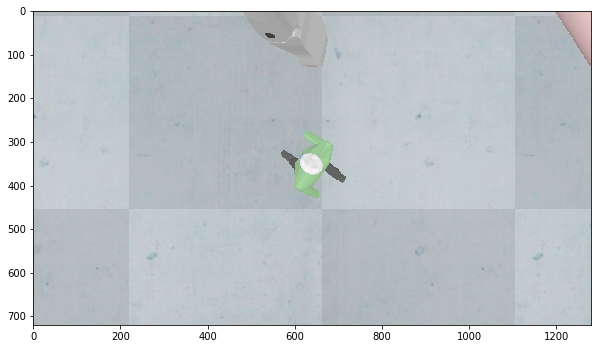

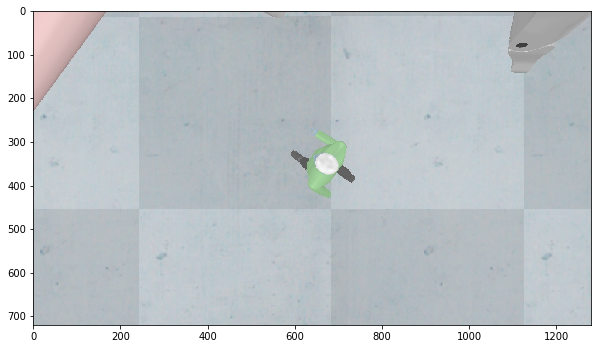

In [3]:
img = read_image('task_3/0zed0.jpg')
show_image(img)
img_ = read_image('task_3/0zed1.jpg')
show_image(img_)

In [4]:
print(get_people(img.copy(), False))
print(get_people(img_.copy(), True))

[(642, 352)]
[(669, 351)]
